<IPython.core.display.Javascript object>


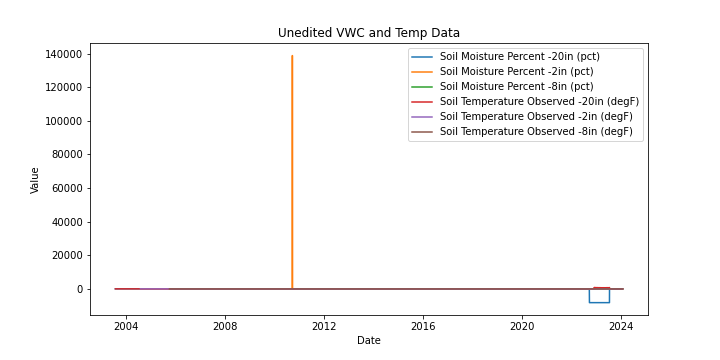

<IPython.core.display.Javascript object>


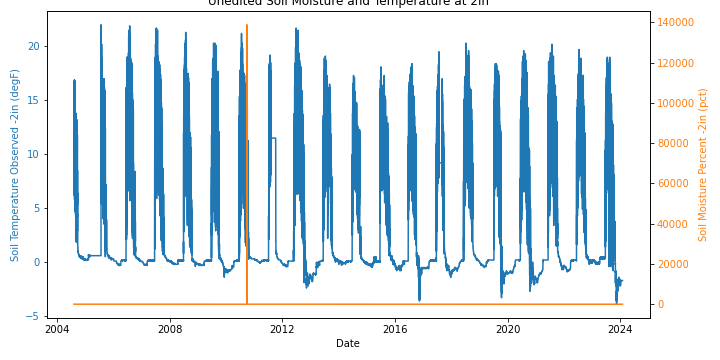

<IPython.core.display.Javascript object>


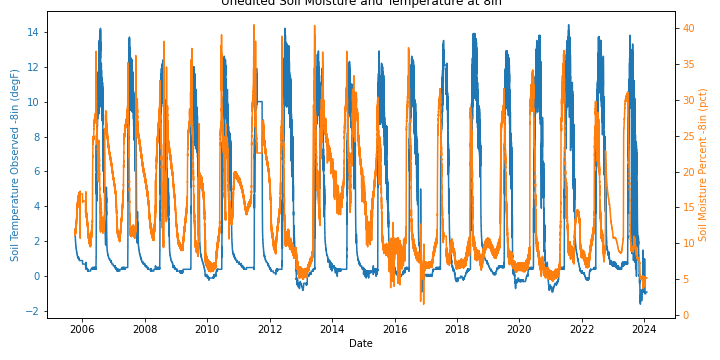

<IPython.core.display.Javascript object>


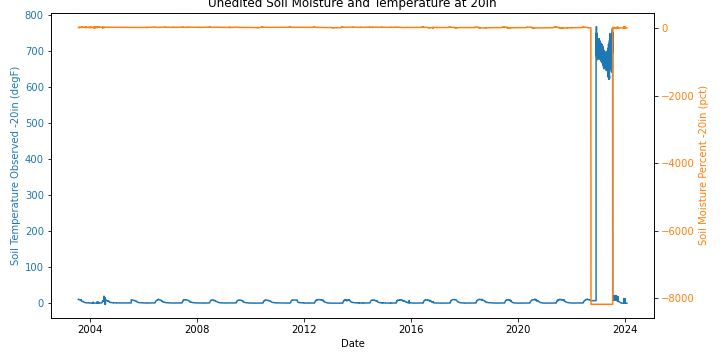

In [2]:
%matplotlib inline
%matplotlib notebook
import pywt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from ipywidgets import interactive


#load the data
def load_and_preprocess_soil_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M', errors='coerce')
    df.set_index('Date', inplace=True)
    df.fillna(method='ffill', inplace=True)
    return df

# Create lists of vwc and temp column names 
file_path = 'DMP_Arapahoe_Ridge.csv'
soil_data = load_and_preprocess_soil_data(file_path)

vwc_columns = [col for col in soil_data.columns if 'Soil Moisture' in col]  #Soil Moisture Percent -8in (pct)
temp_columns = [col for col in soil_data.columns if 'Soil Temperature' in col] #Soil Temperature Observed -8in (degF)


plt.figure(figsize = (10, 5)) 
    
for col in vwc_columns + temp_columns:
    plt.plot(soil_data.index, soil_data[col], label=col)
        
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Unedited VWC and Temp Data')
plt.show()

depths = ['2in', '8in', '20in']
for depth in depths:
    vwc_col = f'Soil Moisture Percent -{depth} (pct)'
    temp_col = f'Soil Temperature Observed -{depth} (degF)'
    
    fig, ax1 = plt.subplots(figsize=(10,5))
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(temp_col, color=color)
    ax1.plot(soil_data.index, soil_data[temp_col], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel(vwc_col, color=color)
    ax2.plot(soil_data.index, soil_data[vwc_col], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()
    plt.title(f'Unedited Soil Moisture and Temperature at {depth}')
    plt.show()
    

<IPython.core.display.Javascript object>


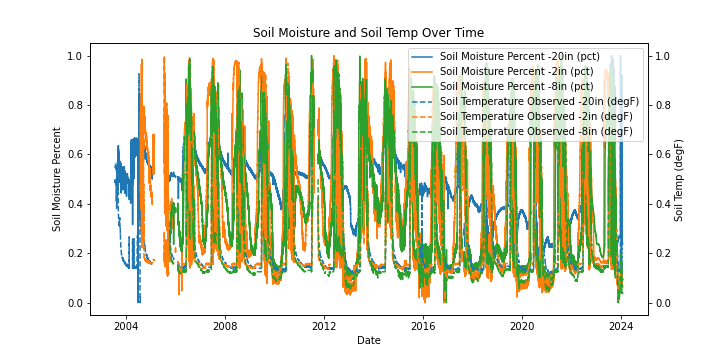

<IPython.core.display.Javascript object>


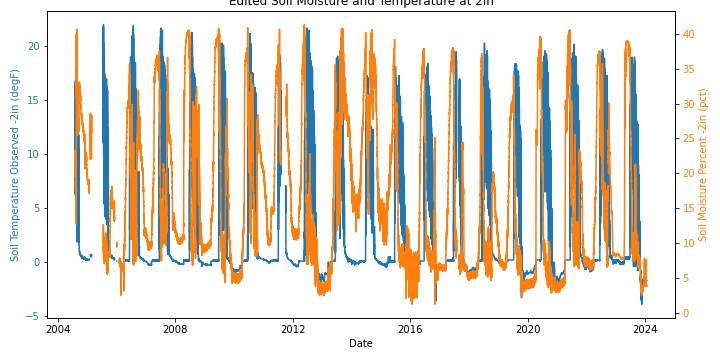

<IPython.core.display.Javascript object>


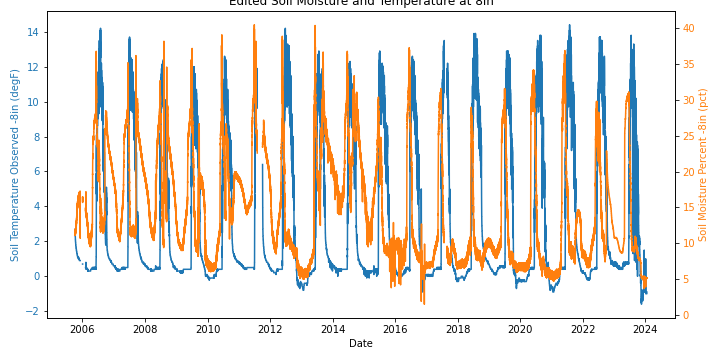

<IPython.core.display.Javascript object>


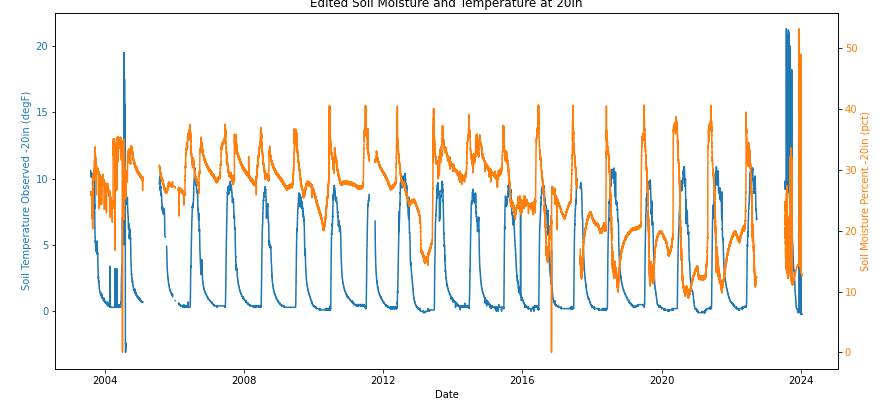

In [21]:

moisture_min_threshold = 0
moisture_max_threshold = 100
temp_min_threshold = -40  #farenheit
temp_max_threshold = 212    #these are the Steven sensor ranges and can be fine tuned with historical context

#load the data
def load_and_preprocess_soil_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M', errors='coerce')
    df.set_index('Date', inplace=True)
    df.replace(-8190, np.nan, inplace=True)
    return df
  
    
#Null out spikes
def blank_out_spikes(df, vwc_columns, temp_columns, vwc_range, temp_range):
    for column in vwc_columns:
        df.loc[(df[column] < vwc_range[0]) | (df[column] > vwc_range[1]), column] = np.nan
    for column in temp_columns:
        df.loc[(df[column] < temp_range[0]) | (df[column] > temp_range[1]), column] = np.nan
    return df    
 

# Create lists of vwc and temp column names 
file_path = 'DMP_Arapahoe_Ridge.csv'
soil_data = load_and_preprocess_soil_data(file_path)


vwc_range = (0,100)
temp_range = (-40,212)  #F

vwc_columns = [col for col in soil_data.columns if 'Soil Moisture' in col]
temp_columns = [col for col in soil_data.columns if 'Soil Temperature' in col]

#Remove spikes from dataset
cleaned_soil_data = blank_out_spikes(soil_data, vwc_columns, temp_columns, vwc_range, temp_range)

#new csv
cleaned_soil_data.to_csv('Cleaned_Soil_Data.csv')


for column in vwc_columns:
    soil_data.loc[soil_data[column] < moisture_min_threshold, column] =np.nan
    soil_data.loc[soil_data[column] > moisture_max_threshold, column] =np.nan
    
for column in temp_columns:
    soil_data.loc[soil_data[column] < temp_min_threshold, column] =np.nan
    soil_data.loc[soil_data[column] > temp_max_threshold, column] =np.nan
       

#print(soil_data.head())
scaler =MinMaxScaler()
soil_data_scaled = pd.DataFrame(scaler.fit_transform(soil_data), index = soil_data.index, columns=soil_data.columns)
plt.figure(figsize=(10,5))
ax1 = plt.gca() #get current axis
for column in vwc_columns:
    ax1.plot(soil_data_scaled.index, soil_data_scaled[column], label=column)
    
#moisture threshold line
#ax1.axhline(y=moisture_min_threshold, color = 'r', linestyle='--', label = 'Min Moisture Threshold')
#ax1.axhline(y=moisture_max_threshold, color = 'r', linestyle='--', label = 'Max Moisture Threshold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Soil Moisture Percent')
#ax1.legend(loc='upper left')

ax2 = ax1.twinx()
for column in temp_columns:
    ax2.plot(soil_data_scaled.index, soil_data_scaled[column], label=column, linestyle='--')
    
#temp threshold line
#ax2.axhline(y=temp_min_threshold, color = 'b', linestyle='-.', label = 'Min Temp Threshold')
#ax2.axhline(y=temp_max_threshold, color = 'b', linestyle='-.', label = 'Max Temp Threshold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Soil Temp (degF)')
#ax2.legend(loc='upper right')
plt.title('Soil Moisture and Soil Temp Over Time')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels + labels2, loc= 'upper right')

plt.show()

depths = ['2in', '8in', '20in']
for depth in depths:
    vwc_col = f'Soil Moisture Percent -{depth} (pct)'
    temp_col = f'Soil Temperature Observed -{depth} (degF)'
    
    fig, ax1 = plt.subplots(figsize=(10,5))
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(temp_col, color=color)
    ax1.plot(soil_data.index, soil_data[temp_col], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel(vwc_col, color=color)
    ax2.plot(soil_data.index, soil_data[vwc_col], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()
    plt.title(f'Edited Soil Moisture and Temperature at {depth}')
    plt.show()
    
    


In [ ]:
#look at data in smaller timeframes.
#look at different trends between vwc and temp
#filtering spikes - could be valid points
#Pearson correlation coef. 
#slopes for bad values
#response time and response trends
#saving changes in DMP is painful...what are ways can I access the database? SNOTEL storage console?
#soil mapping - soil types
#initial data may not be "good" as soil settles around sensors.
#simple thresholding applied but could dabble with: rolling averages, anomaly detection algorithms, signal processing techniques (wavelet transforms)

#Anomaly detection: The IsolationForest ‘isolates’ observations by randomly selecting a feature 
#and then randomly selecting a split value between the maximum and minimum values of the selected feature.
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [ ]:
#next steps: Identify Trends and then get into Data Interpolation

#One Option: Seasonal decomposition - with seasonal patterns I could theoretically decompose the time series into trends..
#..and residuals then interpolate the residuals and recombine.
#https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

#Basic Time Series interpolate()..use time to fill gaps rather than a linear approach

#Polynomial or Spline Interpolation: fit curves to data points, really good for large data sets

#Be mindful of: length and frequency of gaps, diurnal cycles, external variables

<IPython.core.display.Javascript object>


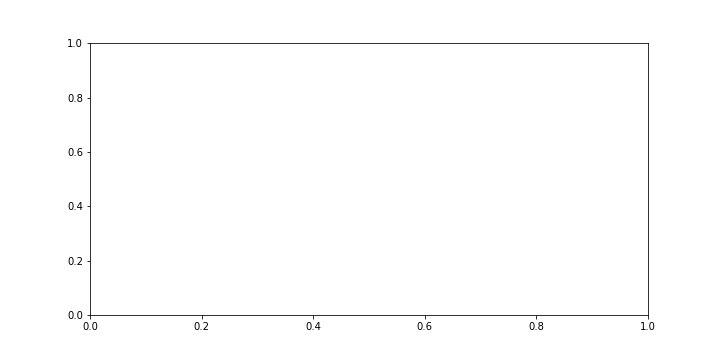

<IPython.core.display.Javascript object>


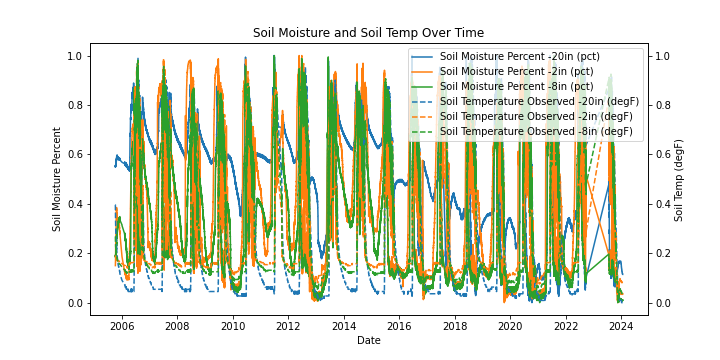

<IPython.core.display.Javascript object>


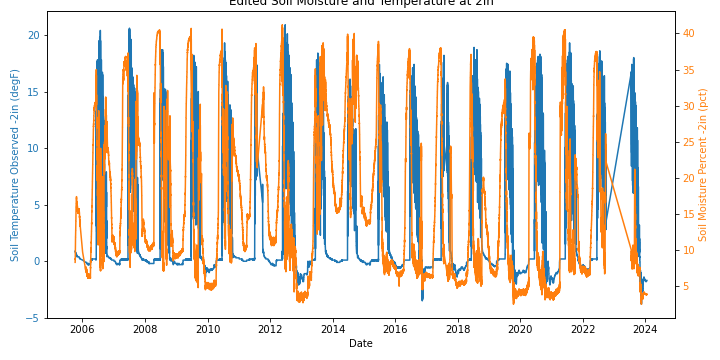

<IPython.core.display.Javascript object>


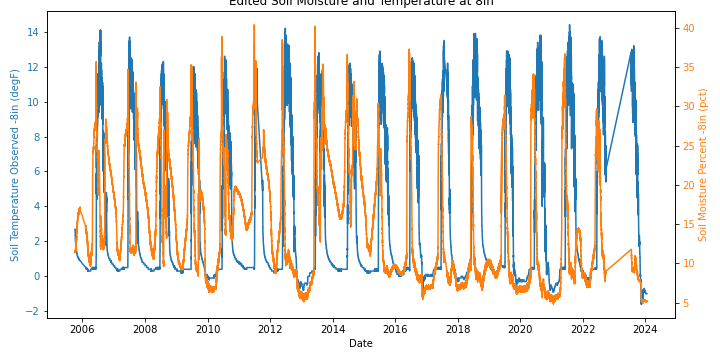

<IPython.core.display.Javascript object>


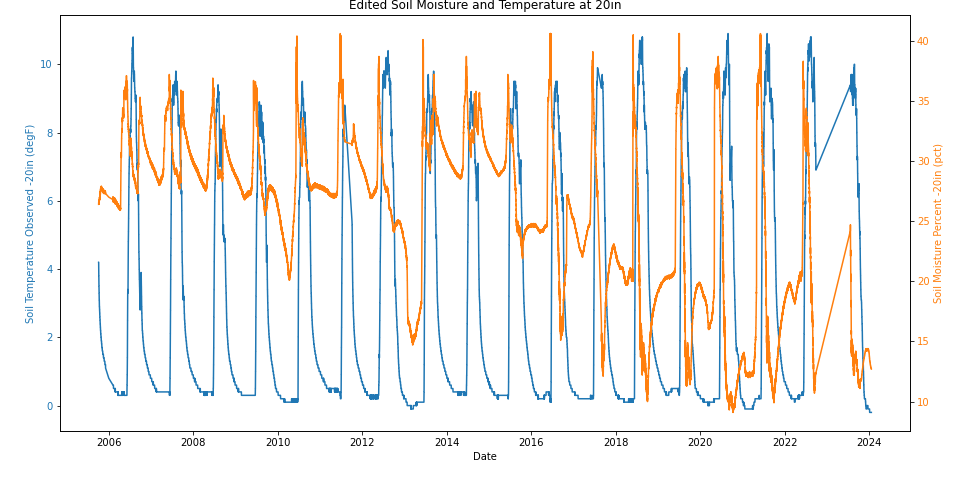

In [20]:
#dabble with rolling median filter to remove more spikes by replacing each data point with the median of neigboring data point 
#less sensitive to outliers than the mean
#might just be safer to remove spikes instead of replacing with neighborig median -> ask Joel/Jordan
#My suggestion: rolling median can be used for smaller data gaps so need to set a threshold on when median is applied
#just remove ALL spikes for the time being

moisture_min_threshold = 0
moisture_max_threshold = 100
temp_min_threshold = -40  #farenheit
temp_max_threshold = 212    #these are the Steven sensor ranges and can be fine tuned with historical context

#load the data
def load_and_preprocess_soil_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M', errors='coerce')
    df.set_index('Date', inplace=True)
    df.replace(-8190, np.nan, inplace=True)  #blank out -8190 values but could also estimate
    return df
  
    
#Null out spikes
def blank_out_spikes(df, vwc_columns, temp_columns, vwc_range, temp_range):
    for column in vwc_columns:
        df.loc[(df[column] < vwc_range[0]) | (df[column] > vwc_range[1]), column] = np.nan
    for column in temp_columns:
        df.loc[(df[column] < temp_range[0]) | (df[column] > temp_range[1]), column] = np.nan
    return df    

def apply_rolling_median(df, window_size=5):
    df_filtered = df.rolling(window=window_size, center=True).median()
    return df_filtered

# Create lists of vwc and temp column names 
file_path = 'DMP_Arapahoe_Ridge.csv'
soil_data = load_and_preprocess_soil_data(file_path)

#initial spike removal using basic thresholding
vwc_range = (0,100)
temp_range = (-40,212)  #F

vwc_columns = [col for col in soil_data.columns if 'Soil Moisture' in col]
temp_columns = [col for col in soil_data.columns if 'Soil Temperature' in col]

#Remove spikes from dataset
cleaned_soil_data = blank_out_spikes(soil_data, vwc_columns, temp_columns, vwc_range, temp_range)

window_size = 5

for column in vwc_columns + temp_columns:
    cleaned_soil_data[column] = apply_rolling_median(cleaned_soil_data[column], window_size)
    
#Drop NaNs from the rolling median
cleaned_soil_data.dropna(inplace=True)

#normalize data via MinMaxScalar
scaler = MinMaxScaler()
soil_data_scaled = pd.DataFrame(scaler.fit_transform(cleaned_soil_data), index = cleaned_soil_data.index, columns = cleaned_soil_data.columns)

plt.figure(figsize=(10,5))
ax1 = plt.gca() #get current axis

#new csv
cleaned_soil_data.to_csv('Cleaned_Soil_Data.csv')


for column in vwc_columns:
    soil_data.loc[soil_data[column] < moisture_min_threshold, column] =np.nan
    soil_data.loc[soil_data[column] > moisture_max_threshold, column] =np.nan
    
for column in temp_columns:
    soil_data.loc[soil_data[column] < temp_min_threshold, column] =np.nan
    soil_data.loc[soil_data[column] > temp_max_threshold, column] =np.nan
       

#print(soil_data.head())
scaler =MinMaxScaler()
soil_data_scaled = pd.DataFrame(scaler.fit_transform(soil_data), index = soil_data.index, columns=soil_data.columns)
plt.figure(figsize=(10,5))
ax1 = plt.gca() #get current axis
for column in vwc_columns:
    ax1.plot(soil_data_scaled.index, soil_data_scaled[column], label=column)
    
#moisture threshold line
#ax1.axhline(y=moisture_min_threshold, color = 'r', linestyle='--', label = 'Min Moisture Threshold')
#ax1.axhline(y=moisture_max_threshold, color = 'r', linestyle='--', label = 'Max Moisture Threshold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Soil Moisture Percent')
#ax1.legend(loc='upper left')

ax2 = ax1.twinx()
for column in temp_columns:
    ax2.plot(soil_data_scaled.index, soil_data_scaled[column], label=column, linestyle='--')
    
#temp threshold line
#ax2.axhline(y=temp_min_threshold, color = 'b', linestyle='-.', label = 'Min Temp Threshold')
#ax2.axhline(y=temp_max_threshold, color = 'b', linestyle='-.', label = 'Max Temp Threshold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Soil Temp (degF)')
#ax2.legend(loc='upper right')
plt.title('Soil Moisture and Soil Temp Over Time')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels + labels2, loc= 'upper right')

plt.show()

depths = ['2in', '8in', '20in']
for depth in depths:
    vwc_col = f'Soil Moisture Percent -{depth} (pct)'
    temp_col = f'Soil Temperature Observed -{depth} (degF)'
    
    fig, ax1 = plt.subplots(figsize=(10,5))
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(temp_col, color=color)
    ax1.plot(soil_data.index, soil_data[temp_col], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel(vwc_col, color=color)
    ax2.plot(soil_data.index, soil_data[vwc_col], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()
    plt.title(f'Edited Soil Moisture and Temperature at {depth}')
    plt.show()
    
    
soil_data_scaled.to_csv('Cleaned_Scaled_Soil_Data.csv')

<IPython.core.display.Javascript object>


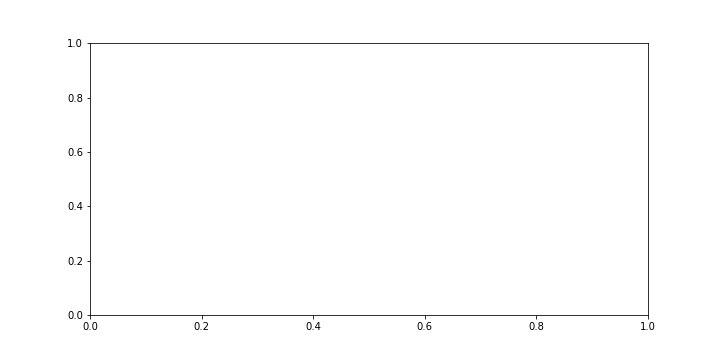

<IPython.core.display.Javascript object>


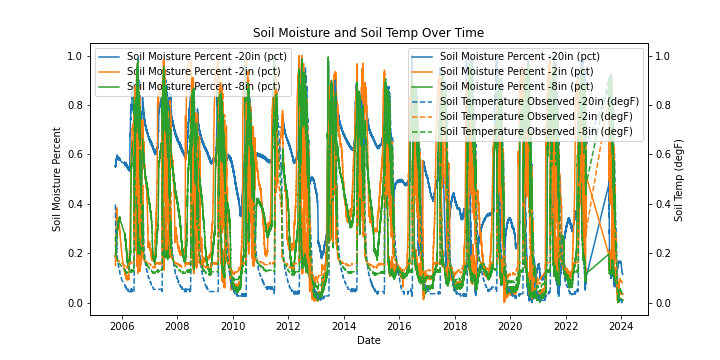

<IPython.core.display.Javascript object>


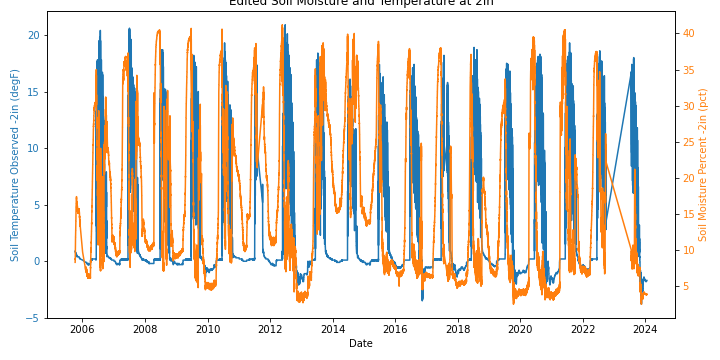

<IPython.core.display.Javascript object>


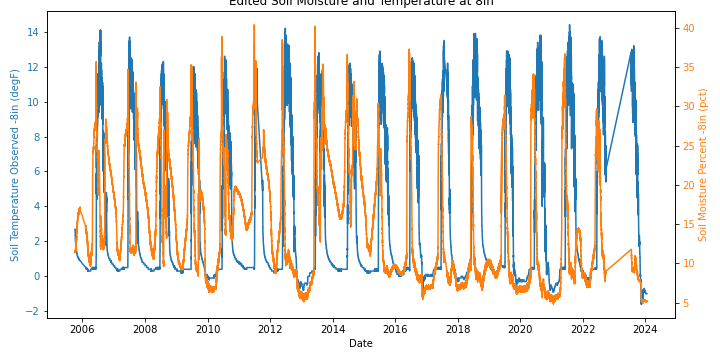

<IPython.core.display.Javascript object>


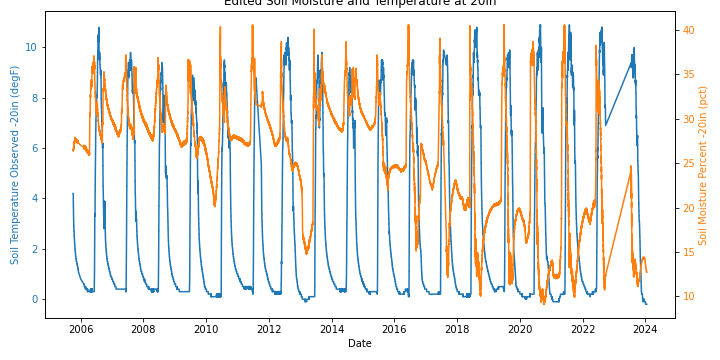

In [23]:
#dabble with Wavelet Transform:

moisture_min_threshold = 0
moisture_max_threshold = 100
temp_min_threshold = -40  #farenheit
temp_max_threshold = 212    #these are the Steven sensor ranges and can be fine tuned with historical context

#load the data
def load_and_preprocess_soil_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M', errors='coerce')
    df.set_index('Date', inplace=True)
    df.replace(-8190, np.nan, inplace=True)  #blank out -8190 values but could also estimate
    return df
  
#Wavelet denoising
def wavelet_denoising(df,)
    
    
#Null out spikes
def blank_out_spikes(df, vwc_columns, temp_columns, vwc_range, temp_range):
    for column in vwc_columns:
        df.loc[(df[column] < vwc_range[0]) | (df[column] > vwc_range[1]), column] = np.nan
    for column in temp_columns:
        df.loc[(df[column] < temp_range[0]) | (df[column] > temp_range[1]), column] = np.nan
    return df    

def apply_rolling_median(df, window_size=5):
    df_filtered = df.rolling(window=window_size, center=True).median()
    return df_filtered

# Create lists of vwc and temp column names 
file_path = 'DMP_Arapahoe_Ridge.csv'
soil_data = load_and_preprocess_soil_data(file_path)

#initial spike removal using basic thresholding
vwc_range = (0,100)
temp_range = (-40,212)  #F

vwc_columns = [col for col in soil_data.columns if 'Soil Moisture' in col]
temp_columns = [col for col in soil_data.columns if 'Soil Temperature' in col]

#Remove spikes from dataset
cleaned_soil_data = blank_out_spikes(soil_data, vwc_columns, temp_columns, vwc_range, temp_range)

window_size = 5

for column in vwc_columns + temp_columns:
    cleaned_soil_data[column] = apply_rolling_median(cleaned_soil_data[column], window_size)
    
#Drop NaNs from the rolling median
cleaned_soil_data.dropna(inplace=True)

#normalize data via MinMaxScalar
scaler = MinMaxScaler()
soil_data_scaled = pd.DataFrame(scaler.fit_transform(cleaned_soil_data), index = cleaned_soil_data.index, columns = cleaned_soil_data.columns)

plt.figure(figsize=(10,5))
ax1 = plt.gca() #get current axis

#new csv
cleaned_soil_data.to_csv('Cleaned_Soil_Data.csv')


for column in vwc_columns:
    soil_data.loc[soil_data[column] < moisture_min_threshold, column] =np.nan
    soil_data.loc[soil_data[column] > moisture_max_threshold, column] =np.nan
    
for column in temp_columns:
    soil_data.loc[soil_data[column] < temp_min_threshold, column] =np.nan
    soil_data.loc[soil_data[column] > temp_max_threshold, column] =np.nan
       

#print(soil_data.head())
scaler =MinMaxScaler()
soil_data_scaled = pd.DataFrame(scaler.fit_transform(soil_data), index = soil_data.index, columns=soil_data.columns)

plt.figure(figsize=(10,5))
ax1 = plt.gca() #get current axis

for column in vwc_columns:
    ax1.plot(soil_data_scaled.index, soil_data_scaled[column], label=column)
    
#moisture threshold line
ax1.set_xlabel('Date')
ax1.set_ylabel('Soil Moisture Percent')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
for column in temp_columns:
    ax2.plot(soil_data_scaled.index, soil_data_scaled[column], label=column, linestyle='--')
    
#temp threshold line
#ax2.axhline(y=temp_min_threshold, color = 'b', linestyle='-.', label = 'Min Temp Threshold')
#ax2.axhline(y=temp_max_threshold, color = 'b', linestyle='-.', label = 'Max Temp Threshold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Soil Temp (degF)')
#ax2.legend(loc='upper right')
plt.title('Soil Moisture and Soil Temp Over Time')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels + labels2, loc= 'upper right')

plt.show()

depths = ['2in', '8in', '20in']
for depth in depths:
    vwc_col = f'Soil Moisture Percent -{depth} (pct)'
    temp_col = f'Soil Temperature Observed -{depth} (degF)'
    
    fig, ax1 = plt.subplots(figsize=(10,5))
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(temp_col, color=color)
    ax1.plot(soil_data.index, soil_data[temp_col], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel(vwc_col, color=color)
    ax2.plot(soil_data.index, soil_data[vwc_col], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()
    plt.title(f'Edited Soil Moisture and Temperature at {depth}')
    plt.show()
    
    
soil_data_scaled.to_csv('Cleaned_Scaled_Soil_Data.csv')

<IPython.core.display.Javascript object>


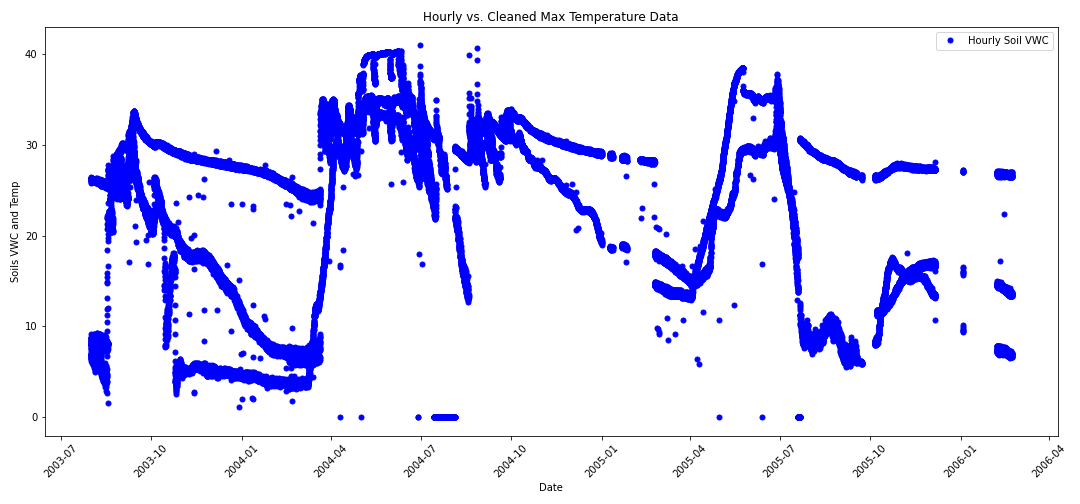

In [5]:
#data fetch for soils
%matplotlib inline
%matplotlib notebook
import pywt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from ipywidgets import interactive
import json
from datetime import datetime
import requests

#DATA FETCH
def fetch_awdb_data(station_triplets, begin_date, end_date, elements, duration):
    base_url = "https://wcc.sc.egov.usda.gov/awdbRestApi/services/v1/data"
    params = {
        "stationTriplets": station_triplets,
        "beginDate": begin_date,
        "endDate": end_date,
        "duration": duration,
        "elements": elements,
        "centralTendencyType": "NONE"
    }
    
    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data: {response.status_code}")
        print(response.text)
        return None

def preprocess_data(data_json):
    if data_json:
        flat_data = [val for sublist in data_json[0]['data'] for val in sublist['values']]
        df = pd.DataFrame(flat_data)
        return df
            

station_triplets ="1030:CO:SNTL"
begin_date = "2003-07-31 00:00"
end_date = "2006-02-22 00:00"

sms_data_json = fetch_awdb_data(station_triplets, begin_date, end_date, "SMS:*:1", "HOURLY")

if sms_data_json is None:
    print("Failed to fetch data. Cannot proceed to data conversion.")
else:
    sms_data = pd.DataFrame([item for sublist in sms_data_json[0]['data'] for item in sublist['values']])

#convert date columns and set as index
for df in [sms_data]:
    df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
    df.set_index('date', inplace = True)
    df['value'] = df['value'].astype(float)

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(sms_data.index, sms_data['value'], label = 'Hourly Soil VWC', color = 'blue', marker ='o', linestyle='None', markersize=5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Soils VWC and Temp')
plt.title('Hourly vs. Cleaned Max Temperature Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#to do: sort data by height and then plot
#pull data in pieces to work around 50,000 value cap
#make end date dynamic
#query for start date

In [ ]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_cachedir())
print(matplotlib.matplotlib_fname())
import matplotlib.ft2font as ft2
print(ft2.__file__)

In [ ]:
#!pip install pywt seaborn scikit-learn   *install individually..
#!conda install seaborn scikit-learn pywavelets -y